In [36]:
from graph_lib import MyGraph
import random
import copy

In [37]:
def getRandomEulerGraph(n):
    max_level = n -1
    if max_level%2 !=0:
        max_level = max_level-1
    lists = []
    
    for i in range(n):
        if i==0:
            for i in range(2,max_level+1,2): 
                lists.append([i])
        else:
            new_lists = []
            for list in lists:
                last_el = list[len(list)-1]
                for i in range(2,last_el+1,2):
                    temp = list.copy()
                    temp.append(i)
                    #print(temp)
                    new_lists.append(temp)
            lists = new_lists
    
    viable_lists = []
    for list in lists:
        if MyGraph.isGraphicSequence(list):
            adj_list = MyGraph.constructGraphFromGraphical(list)
            graph = MyGraph(adj_list,1)
            if graph.isGraphConnected():
                #print(list)
                viable_lists.append(graph)
    return random.choice(viable_lists)

In [42]:
def getNumberOfConnectedComponents(adj_list):
    graph = MyGraph(adj_list,1)
    colored = graph.divideGraphIntoConnectedComponents()
    return max(colored)
    
def removeEdge(adj_list,p,q):
    new = copy.deepcopy(adj_list)
    new[p].remove(q)
    new[q].remove(p)
    return new
    
def findEulerSequence(adj_list_arg):
    adj_list = copy.deepcopy(adj_list_arg)
    #print(adj_list)
    sequnce = []
    current = 0
    sequnce.append(current)
    while(len(adj_list[current])>0):
        onyBridges = True
        for neighbour in adj_list[current]:
            new = removeEdge(adj_list,current,neighbour)
            if getNumberOfConnectedComponents(adj_list)==getNumberOfConnectedComponents(new):
                #print("usuwamy: ", current, neighbour)
                adj_list=new
                current = neighbour
                sequnce.append(neighbour)
                onyBridges = False
                #print(adj_list,"not bridge")
                break
        if onyBridges:
            #print("usuwamy: ", current, neighbour)
            neighbour = adj_list[current][0]
            new = removeEdge(adj_list,current,neighbour)
            adj_list=new
            current = neighbour
            sequnce.append(neighbour)
            #print(adj_list,"bridge")
    return sequnce

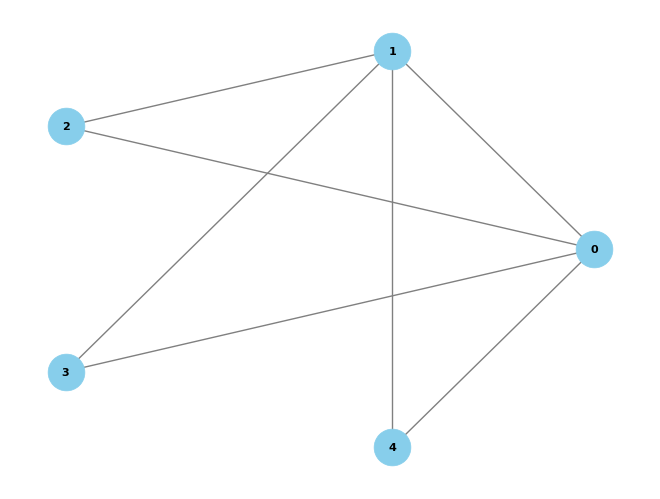

[0, 1, 2, 0, 3, 1, 4, 0]


In [43]:
graph = getRandomEulerGraph(5)
graph.showGraph()
seq = findEulerSequence(graph.adjacencyList)
print(seq)